In [148]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Answer1:1154112
Answer2:19.1672240937939


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Ansert3: diff_columns:44286


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Ansert4: pickup_location_id_na_rate:83.52732770722618


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Answer5: dimensionality of this matrix: 525
Answer6: RMSE on train: 10.528519107210744


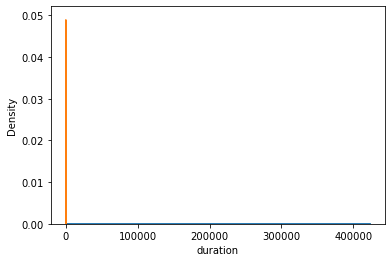

In [162]:
def parquet_to_df(file_path: Path):
    return pd.read_parquet(file_path)

def find_df_columns(df: pd.core.frame.DataFrame):
    return df.shape[0]

def generate_duration_by_mins(dropOff_datetime: pd.core.series.Series, pickup_datetime: pd.core.series.Series):
    duration = (dropOff_datetime - pickup_datetime).apply(lambda _ : _.total_seconds())
    return duration / 60

def calculate_duration_avg(duration: pd.core.series.Series):
    return duration.mean()

def clean_duration(df, start_mins, end_mins):
    return df[
        (df.duration >= start_mins) &
        (df.duration <= end_mins)
    ]
    
def draw_column_distribution(column: pd.core.series.Series):
    sns.distplot(column)

def calculate_column_NA_rate(column: pd.core.series.Series):
    return column.isnull().mean() * 100

def filled_na_with_column(df, column, value):
    df[column] = df[column].fillna(value)
    return df
    
def transform_columns_type_to_str(df, columns):
    return df[columns].astype(str)

def df_to_dict(df):
    return df.to_dict(orient='records')

def one_hot_encoding_transform(dicts):
    dv = DictVectorizer()
    return (dv, dv.fit_transform(dicts))

def get_label_value(df, label):
    return df[label].values

def train_model(training_feature, training_label, linear_model):
    lr = linear_model()
    lr.fit(training_feature, training_label)
    return lr



file_path=Path("./data/fhv_tripdata_2021-01.parquet")
df = parquet_to_df(file_path)
df_columns = find_df_columns(df)
print(f"Answer1:{df_columns}")
df["duration"] = generate_duration_by_mins(df["dropOff_datetime"], df["pickup_datetime"])
duration_avg = calculate_duration_avg(df["duration"])
print(f"Answer2:{duration_avg}")
draw_column_distribution(df["duration"])
new_df = clean_duration(df, 1, 60)
new_df_columns = find_df_columns(new_df)
diff_columns = df_columns - new_df_columns 
print(f"Ansert3: diff_columns:{diff_columns}")
draw_column_distribution(new_df["duration"])
pickup_location_id_na_rate = calculate_column_NA_rate(new_df["PUlocationID"])
print(f"Ansert4: pickup_location_id_na_rate:{pickup_location_id_na_rate}")
new_df = filled_na_with_column(new_df, "PUlocationID", -1)
new_df = filled_na_with_column(new_df, "DOlocationID", -1)
categorical = ['PUlocationID', 'DOlocationID']
train_dicts = df_to_dict(transform_columns_type_to_str(new_df, categorical))
dv, x_train = one_hot_encoding_transform(train_dicts)
print(f"Answer5: dimensionality of this matrix: {len(dv.feature_names_)}")
label =  'duration'
y_train = new_df[label].values
model = train_model(x_train, y_train, LinearRegression)
y_pred = model.predict(x_train)
train_rsme = mean_squared_error(y_train, y_pred, squared=False)
print(f"Answer6: RMSE on train: {train_rsme}")


In [154]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')
plt.legend()

In [190]:
file_path=Path("./data/fhv_tripdata_2021-02.parquet")
df_02 = parquet_to_df(file_path)
df_02["duration"] = generate_duration_by_mins(df_02["dropOff_datetime"], df_02["pickup_datetime"])
new_df_02 = clean_duration(df_02, 1, 60)
new_df_02 = filled_na_with_column(new_df_02, "PUlocationID", -1)
new_df_02 = filled_na_with_column(new_df_02, "DOlocationID", -1)
new_df_02 = new_df_02[new_df_02["DOlocationID"] != 110]
categorical = ['PUlocationID', 'DOlocationID']
label =  'duration'
y_train = new_df_02[label].values
train_dicts_02 = df_to_dict(transform_columns_type_to_str(new_df_02, categorical))
dv_02, x_train_02 = one_hot_encoding_transform(train_dicts_02)
y_pred_02 = model.predict(x_train_02)
evaluate_rsme = mean_squared_error(y_train, y_pred_02, squared=False)
print(f"Answer7: RMSE on train: {evaluate_rsme}")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Answer7: RMSE on train: 11.014253835656056
